In [34]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
#import seaborn as sns
from IPython import display
import time
import h5py

In [2]:
filename = '../data/better_data/val_all.h5'
f = h5py.File(filename, "r")


# keys are for the different DEMS

In [3]:
print(f.keys())

<KeysViewHDF5 ['103', '112', '131', '191', '26', '292', '32', '445', '47', '515', '53', '56', '709', '72', '772', '80', '818', '819']>


## We are only going to look at dems 26, 292, 709, 819

In [65]:
dset_26 = f['26']
dset_292 = f['292']
dset_709 = f['709']
dset_819 = f['819']
dsets = [dset_26, dset_292, dset_709, dset_819]
print(dset_26.keys())
print(dset_292.keys())
print(dset_709.keys())
print(dset_819.keys())

area26 = np.loadtxt("../data/better_data/" + '26' + "_dem.asc", skiprows=6)
area292 = np.loadtxt("../data/better_data/" + '292' + "_dem.asc", skiprows=6)
area709 = np.loadtxt("../data/better_data/" + '709' + "_dem.asc", skiprows=6)
area819 = np.loadtxt("../data/better_data/" + '819' + "_dem.asc", skiprows=6)

mask26 =  dset_26['mask']
mask292 = dset_292['mask']
mask709 = dset_709['mask']
mask819 = dset_819['mask']


area26 *= mask26
area292 *= mask292
area709 *= mask709
area819 *= mask819

<KeysViewHDF5 ['dem', 'event_name', 'mask', 'rainfall_events_0', 'rainfall_events_1', 'rainfall_events_10', 'rainfall_events_11', 'rainfall_events_12', 'rainfall_events_13', 'rainfall_events_14', 'rainfall_events_2', 'rainfall_events_3', 'rainfall_events_4', 'rainfall_events_5', 'rainfall_events_6', 'rainfall_events_7', 'rainfall_events_8', 'rainfall_events_9', 'timesteps_0', 'timesteps_1', 'timesteps_10', 'timesteps_11', 'timesteps_12', 'timesteps_13', 'timesteps_14', 'timesteps_2', 'timesteps_3', 'timesteps_4', 'timesteps_5', 'timesteps_6', 'timesteps_7', 'timesteps_8', 'timesteps_9', 'waterdepth_0', 'waterdepth_1', 'waterdepth_10', 'waterdepth_11', 'waterdepth_12', 'waterdepth_13', 'waterdepth_14', 'waterdepth_2', 'waterdepth_3', 'waterdepth_4', 'waterdepth_5', 'waterdepth_6', 'waterdepth_7', 'waterdepth_8', 'waterdepth_9']>
<KeysViewHDF5 ['dem', 'event_name', 'mask', 'rainfall_events_0', 'rainfall_events_1', 'rainfall_events_10', 'rainfall_events_11', 'rainfall_events_12', 'rainfal

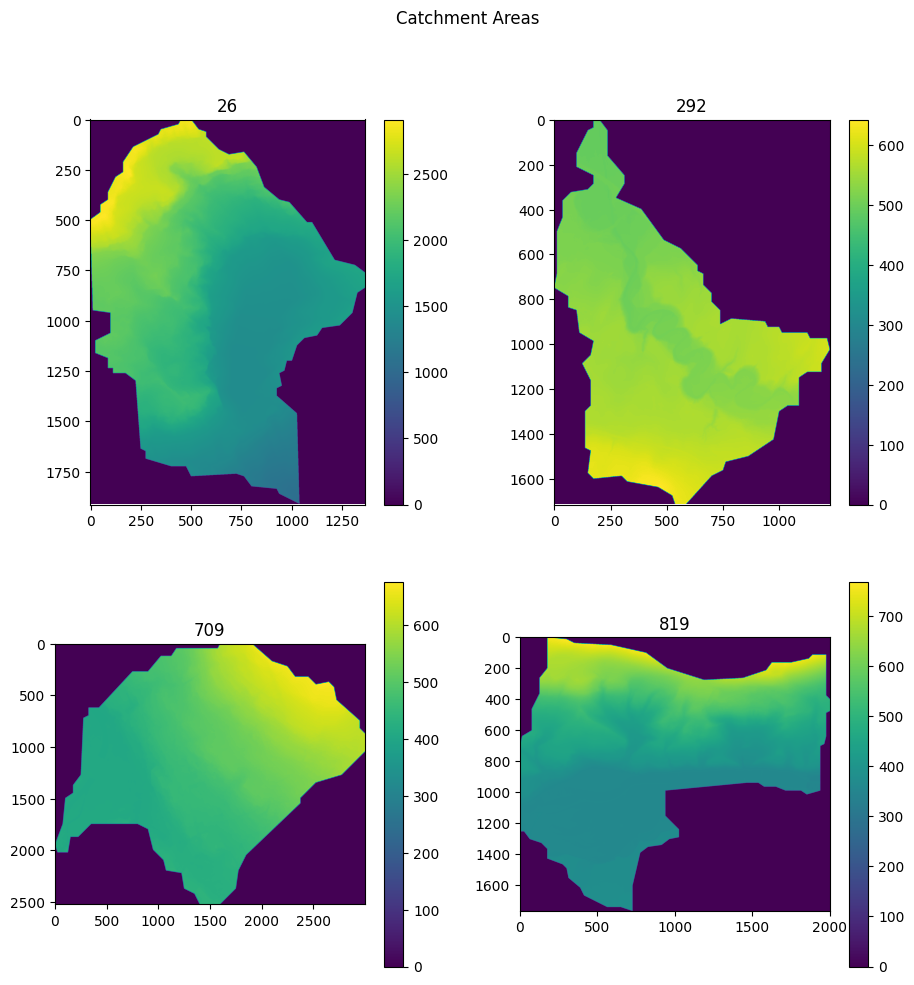

In [66]:


plt.figure(figsize=(11, 11))
plt.suptitle("Catchment Areas")
plt.subplot(2, 2, 1)
plt.imshow(area26)
plt.title("26")
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(area292)
plt.title("292")
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(area709)
plt.title("709")
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(area819)
plt.title("819")
plt.colorbar()

# display.clear_output(wait=True)
# display.display(plt.gcf())

In [67]:
event_name_26 = np.array(dset_26['event_name'])
event_name_292 = np.array(dset_292['event_name'])
event_name_709 = np.array(dset_709['event_name'])
event_name_819 = np.array(dset_819['event_name'])

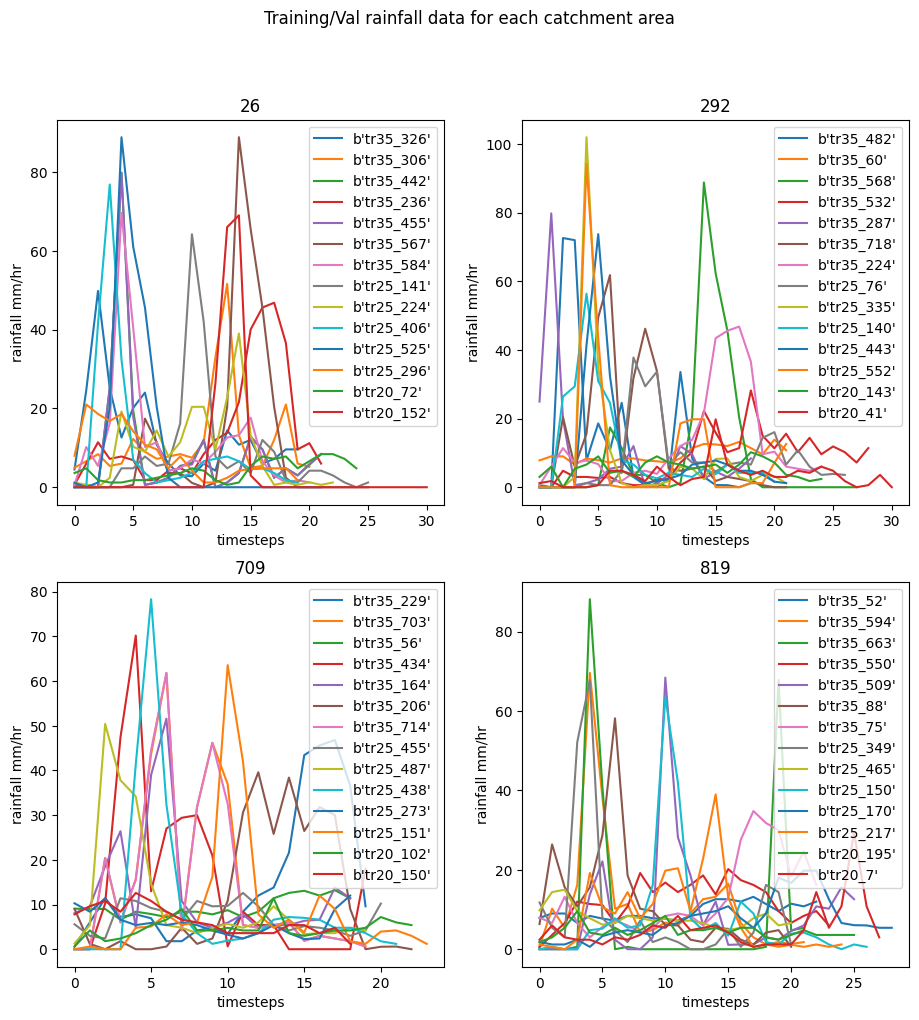

In [68]:
dems = ["26", "292", "709", "819"]
ind = [1, 2, 3, 4]
rainfall_events_train = ['rainfall_events_0', 'rainfall_events_1', 'rainfall_events_2', 'rainfall_events_3', 'rainfall_events_4', 'rainfall_events_5', 'rainfall_events_6', 'rainfall_events_7', 'rainfall_events_8', 'rainfall_events_9', 'rainfall_events_10', 'rainfall_events_11', 'rainfall_events_12', 'rainfall_events_13']
plt.figure(figsize=(11, 11))
plt.suptitle("Training/Val rainfall data for each catchment area")
for i, dset, dem, in zip(ind, dsets, dems):
    plt.subplot(2, 2, i)
    for index, rf in enumerate(rainfall_events_train):  
        plt.plot(range(len(dset[rf])), np.array(dset[rf]), label=dset["event_name"][index])
        plt.ylabel("rainfall mm/hr")
        plt.xlabel("timesteps")
        plt.legend()
        plt.title(dem)



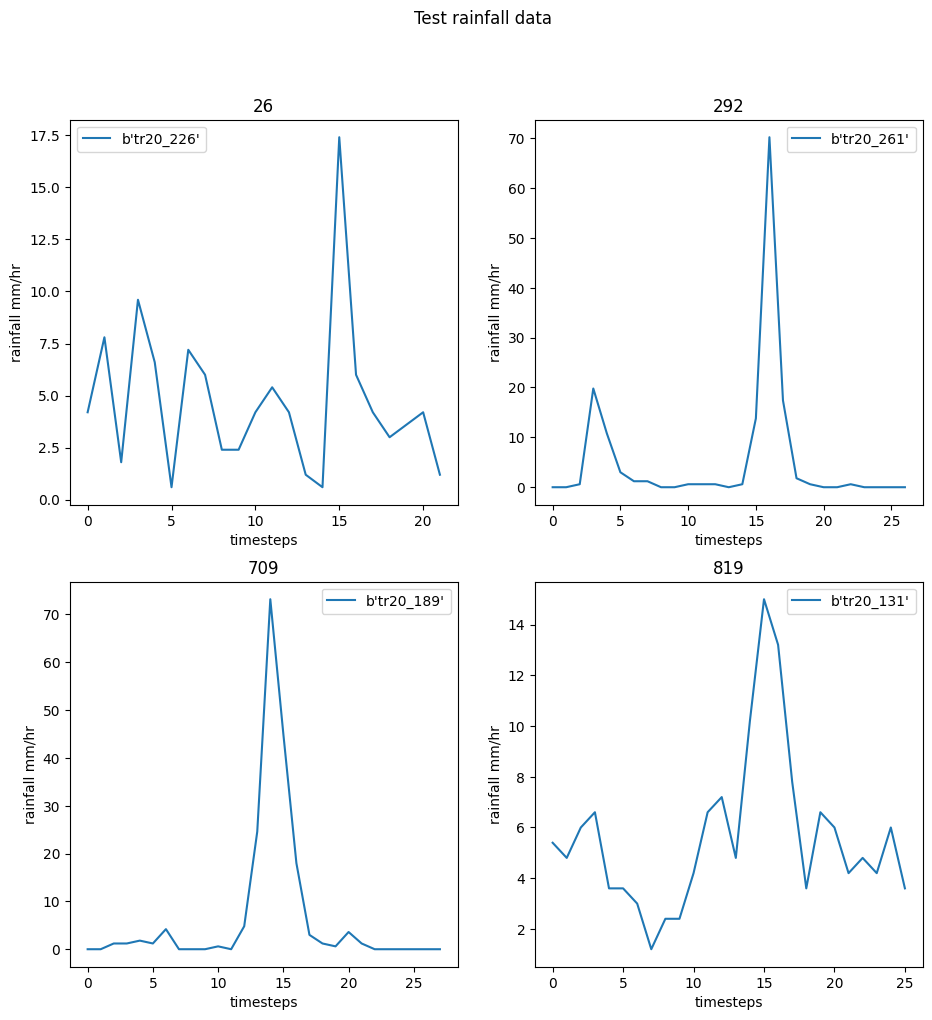

In [69]:
dems = ["26", "292", "709", "819"]
ind = [1, 2, 3, 4]
rainfall_events_test = 'rainfall_events_14'
plt.figure(figsize=(11, 11))
plt.suptitle("Test rainfall data")
for i, dset, dem, in zip(ind, dsets, dems):
    plt.subplot(2, 2, i) 
    plt.plot(range(len(dset[rainfall_events_test])), np.array(dset[rainfall_events_test]), label=dset["event_name"][-1])
    plt.ylabel("rainfall mm/hr")
    plt.xlabel("timesteps")
    plt.legend()
    plt.title(dem)

In [70]:
print(len(np.array(dset['rainfall_events_14'])))

26


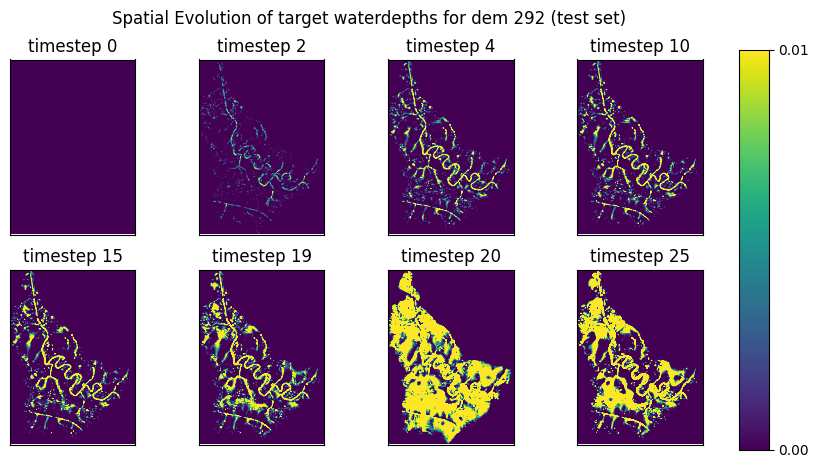

In [82]:
# example water events
dem ="292"
dset = dset_292
ind = [i+1 for i in range(0, len(np.array(dset['rainfall_events_14'])))]
rainfall_events_test = 'rainfall_events_14'
vmin = 0#np.min(np.array(dset_292["waterdepth_14"]))
vmax = 0.01#np.max(np.array(dset_292["waterdepth_14"]))
plt.figure(figsize=(10, 5))
plt.suptitle("Spatial Evolution of target waterdepths for dem 292 (test set)")

plt.subplot(2, 4, 1)
plt.imshow((np.array(dset_292["waterdepth_14"]))[0,...], vmin=vmin, vmax=vmax)
plt.title("timestep 0")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 2)
plt.imshow((np.array(dset_292["waterdepth_14"]))[5,...], vmin=vmin, vmax=vmax)
plt.title("timestep 2")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 3)
plt.imshow((np.array(dset_292["waterdepth_14"]))[8,...], vmin=vmin, vmax=vmax)
plt.title("timestep 4")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 4)
plt.imshow((np.array(dset_292["waterdepth_14"]))[10,...], vmin=vmin, vmax=vmax)
plt.title("timestep 10")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 5)
plt.imshow((np.array(dset_292["waterdepth_14"]))[13,...], vmin=vmin, vmax=vmax)
plt.title("timestep 15")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 6)
plt.imshow((np.array(dset_292["waterdepth_14"]))[16,...], vmin=vmin, vmax=vmax)
plt.title("timestep 19")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 7)
plt.imshow((np.array(dset_292["waterdepth_14"]))[19,...], vmin=vmin, vmax=vmax)
plt.title("timestep 20")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 8)
plt.imshow((np.array(dset_292["waterdepth_14"]))[25,...], vmin=vmin, vmax=vmax)
plt.title("timestep 25")
plt.xticks([])
plt.yticks([])

plt.subplots_adjust(right=0.85)  # Adjust the position of subplots
cax = plt.axes([0.87, 0.1, 0.03, 0.8])  # Position and size of the color bar
# Get the minimum and maximum values for color mapping



# Add the color bar with adjusted scale
plt.colorbar(cax=cax, ticks=[vmin, vmax])  # Set the color bar ticks as per vmin and vmax


### in each dataset there are:
- dem: 
    - minmax normalized dem
- event_name:
    - the rainfall event name
- mask: 
    - mask to remove areas outside of catchment
- 0-14 rainfall_events_ : 
    - mm/hr rainfall. Needs to intopolated to 10 mins
- 0-14 timesteps_: 
    - seconds for each rainfall event
- 0-14 waterdepths: 
    - waterdepth of each cell in the catchment in meters

In [ ]:
water_events_train = ['waterdepth_0', 'waterdepth_1', 'waterdepth_2', 'waterdepth_3', 'waterdepth_4', 'waterdepth_5', 'waterdepth_6', 'waterdepth_7', 'waterdepth_8', 'waterdepth_9', 'waterdepth_10', 'waterdepth_11', 'waterdepth_12', 'waterdepth_13']
water_events_test ='waterdepth_14'

rainfall_events_train = ['rainfall_events_0', 'rainfall_events_1', 'rainfall_events_2', 'rainfall_events_3', 'rainfall_events_4', 'rainfall_events_5', 'rainfall_events_6', 'rainfall_events_7', 'rainfall_events_8', 'rainfall_events_9', 'rainfall_events_10', 'rainfall_events_11', 'rainfall_events_12', 'rainfall_events_13']
rainfall_events_test = 'rainfall_events_14'

#dems = ['26', '292', '709', '819']
dems = ['292']


print(np.array(dset_292[rainfall_events_test]))
print(len(np.array(dset_292[rainfall_events_test])))

[ 0.   0.   0.6 19.8 10.8  3.   1.2  1.2  0.   0.   0.6  0.6  0.6  0.
  0.6 13.8 70.2 17.4  1.8  0.6  0.   0.   0.6  0.   0.   0.   0. ]
27


The main objective is to try and get the model to generalize to different rainfall patters. so we will save the last rainfall event for test-case

In [ ]:
# subset_size = 120
# num_samples = 20
# for dem in dems:
#     inputs = []
#     targets = []
#     dset = f[dem]
#     area = np.loadtxt("../data/better_data/" + dem + "_dem.asc", skiprows=6)
#     mask = np.array(dset['mask'])
#     area*=mask
#     for wd, rfe in zip(water_events_train, rainfall_events_train):
#         water_depth = np.array(dset[wd])
#         rainfall = np.array(dset[rfe])
#         # print(water_depths.shape) c, h, w
#         timesteps, height, width = water_depth.shape
#         samples = 0
#         while samples < num_samples:
#             x = np.random.randint(0, height - subset_size)
#             y = np.random.randint(0, width-subset_size)
#             # if np.count_nonzero(mask[x:x+subset_size, y:y+subset_size]) < (subset_size//1.2)**2:
#             #     continue
            
#             for t in range(timesteps-1):
#                 feature_dem = area[x:x+subset_size, y:y+subset_size]
#                 feature_rainfall = np.zeros([subset_size, subset_size])
#                 feature_rainfall += rainfall[t]
#                 feature_wd = water_depth[t, x:x+subset_size, y:y+subset_size]
#                 feature_mask = mask[x:x+subset_size, y:y+subset_size]
#                 feature_rainfall *=feature_mask
#                 features = np.stack((feature_wd, feature_rainfall, feature_dem), axis=-1)
#                 target = water_depth[t+1, x:x+subset_size, y:y+subset_size]
#                 inputs.append(features)
#                 targets.append(target)
#             samples +=1
#     inputs = np.array(inputs)
#     targets = np.array(targets)
#     np.save("../datasets/inputs_"+dem +"_.npy", inputs)
#     np.save("../datasets/targets_"+dem +"_.npy", targets)

#     # now we also need the test set which will be event14
#     num_test_samples = 1
#     test_samples = 0
#     test_inputs = []
#     test_targets = []
#     test_waterdepths = np.array(dset[water_events_test])
#     test_rainfall = np.array(dset[rainfall_events_test])
#     timesteps, height, width = test_waterdepths.shape
#     test_size_reduced = 300
#     h, w = area.shape
#     while test_samples < num_test_samples:
#         for t in range(timesteps-1):
#             feature_dem = area[h//2-test_size_reduced:h//2 + test_size_reduced, w//2-test_size_reduced:w//2+test_size_reduced]
#             feature_rainfall = np.zeros([*feature_dem.shape])
#             feature_rainfall += test_rainfall[t]
#             feature_rainfall *= mask[h//2-test_size_reduced:h//2 + test_size_reduced, w//2-test_size_reduced:w//2+test_size_reduced]
#             feature_wd = test_waterdepths[t,h//2-test_size_reduced:h//2 + test_size_reduced, w//2-test_size_reduced:w//2+test_size_reduced]
#             features = np.stack((feature_wd, feature_rainfall, feature_dem), axis=-1)
#             target = test_waterdepths[t+1, h//2-test_size_reduced:h//2 + test_size_reduced, w//2-test_size_reduced:w//2+test_size_reduced]
#             test_inputs.append(features)
#             test_targets.append(target)
#         test_samples +=1
#     test_inputs = np.array(test_inputs)
#     test_targets = np.array(test_targets)
#     np.save("../datasets/test_inputs_"+dem +"_.npy", test_inputs)
#     np.save("../datasets/test_targets_"+dem +"_.npy", test_targets)

In [ ]:
f.close()

lenth of test_set = 
- '26' = 22
- '292' = 27
- '709' = 28
- '819' = 26

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#from training.losses import CustomMSE

2023-07-05 17:44:12.015833: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [115]:
# lets try for dem 709
inputs = np.load("../datasets/inputs_un_normed_26_.npy")
inputs, inputs_dem, inputs_rainfall = inputs[..., 0], inputs[..., 1], inputs[...,2]
inputs_dem = (inputs_dem - inputs_dem.min()) / (inputs_dem.max() - inputs_dem.min())

# inputs_rainfall /= 100
inputs = np.stack([inputs, inputs_rainfall,  inputs_dem,], axis=-1)
targets = np.load("../datasets/targets_un_normed_26_.npy")

test_inputs = np.load("../datasets/test_inputs_un_normed_26_.npy")
test_inputs, test_inputs_rainfall, test_inputs_dem = test_inputs[..., 0], test_inputs[..., 1], test_inputs[...,2]
test_inputs_dem = (test_inputs_dem - test_inputs_dem.min()) / (test_inputs_dem.max() - test_inputs_dem.min())

# test_inputs_rainfall /= 100
test_inputs = np.stack([test_inputs, test_inputs_rainfall, test_inputs_dem,], axis=-1)
test_targets = np.load("../datasets/test_targets_un_normed_26_.npy")

In [4]:
inputs.shape

(9210, 120, 120, 3)

In [5]:
targets.shape

(9210, 120, 120)

In [6]:
test_targets.shape

(21, 400, 400)

In [116]:
x_train, x_val, y_train, y_val =  train_test_split(inputs, targets, test_size=0.2, random_state=42, shuffle=False) # order: x_train, x_val, y_train, y_val

In [117]:
simple_model_cfg6 = {
    "name": "model6",
    "num_conv_filters": 80,
    "1x1_conv_filters": 64,
    "test": True
}


In [118]:
class BenchMarkCNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dmodel = tf.keras.Sequential([
            tf.keras.layers.Conv2D(16, 5, padding="same", activation=tf.nn.relu),
            tf.keras.layers.Conv2D(32, 5, padding="same", activation=tf.nn.relu),
            tf.keras.layers.Conv2D(32, 5, padding="same", activation=tf.nn.relu),
            tf.keras.layers.Conv2D(1, 1, activation=None)
        ])
        self(tf.zeros([1, 3, 3, 4]))

    def call(self, x):
        dx = self.dmodel(x)
        f1, f2, f3, f4 = tf.unstack(x, axis=-1)
        f1 =tf.expand_dims(f1, -1)
        # zero_mask = dx < 0
        # zero_mask = ~zero_mask
        # dx*=tf.cast(zero_mask, tf.float32)

        return dx + f1



class SimpleCNN(tf.keras.Model):
    def __init__(self, model_config):
        super().__init__()
        self.config = model_config
        self.dmodel = tf.keras.Sequential([
            tf.keras.layers.Conv2D(self.config['num_conv_filters'], 3, padding="same", activation=tf.nn.relu),
            tf.keras.layers.Conv2D(self.config['1x1_conv_filters'], 1, activation=tf.nn.relu),
            tf.keras.layers.Conv2D(1, 1, activation=None)
        ])
        self(tf.zeros([1, 3, 3, 3]))

    def call(self, x):
        dx = self.dmodel(x)
        f1, f2, f3 = tf.unstack(x, axis=-1)
        f1 =tf.expand_dims(f1, -1)
        return dx + f1

class ComplexCNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dmodel = tf.keras.Sequential([
            tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same"),
            tf.keras.layers.DepthwiseConv2D(3, depth_multiplier = 10, activation=tf.nn.relu, padding="same"),
            tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same"),
            tf.keras.layers.Conv2D(1, 1, activation=None, padding="same", kernel_initializer=tf.zeros_initializer)
        ])
        self(tf.zeros([1, 3, 3, 3]))

    
    def call(self, x):
        # y = self.perceive(x)
        dx = self.dmodel(x)
        f1, f2, f3 = tf.unstack(x, axis=-1)
        f1 =tf.expand_dims(f1, -1)

        return dx + f1


In [119]:
from tensorflow import keras
class CustomMSE(keras.losses.Loss):
    def __init__(self, name="custom_mse"):
        super().__init__(name=name)
        

    # def call(self, y_true, y_pred):
    #     mse = tf.math.reduce_mean(tf.square(y_true - y_pred), axis=-1)
    #     reg = tf.math.reduce_mean(tf.square(0.5 - y_pred), axis=-1) # here we can change this so the model doesn't predict 0's
    #     return mse + reg * self.regularization_factor

    # martins code (wegihted_mse_loss)
    @tf.autograph.experimental.do_not_convert
    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        error = y_true - y_pred[...,0]
        squared_error = tf.square(error)
        # Create masks for zero and non-zero elements in y_true
        zero_mask = tf.cast(tf.equal(y_true, 0), tf.float32)
        non_zero_mask = 1 - zero_mask

        # number_of_zeros, number_of_non_zeros = self._count_zeros_non_zeros(y_true)
        number_of_zeros = tf.math.count_nonzero(y_true==0,)

        number_of_non_zeros = tf.math.count_nonzero(y_true!=0)
        
        total_number_of_elements = number_of_zeros + number_of_non_zeros
        
        non_zero_weight = number_of_zeros / total_number_of_elements
        
        zero_weight = number_of_non_zeros / total_number_of_elements

        # Apply weights to the squared error based on the masks
        weighted_squared_error = tf.cast(squared_error, dtype=tf.float32) * (tf.cast(non_zero_mask, tf.float32) * tf.cast(non_zero_weight, dtype=tf.float32) + tf.cast(zero_mask, dtype=tf.float32) * tf.cast(zero_weight, dtype=tf.float32))
 
        # Calculate the mean of the weighted squared errors
        loss = 100*tf.reduce_mean(weighted_squared_error)
        return loss


In [249]:
from tensorflow import keras
class CustomMSE2(keras.losses.Loss):
    def __init__(self, name="custom_mse2"):
        super().__init__(name=name)
        
    @tf.autograph.experimental.do_not_convert
    def call(self, y_true, y_pred):
        
        error = y_true - y_pred[...,0]
        squared_error = tf.abs(error)
        # Create masks for zero and non-zero elements in y_true
        zero_mask = tf.cast(tf.equal(y_true, 0), tf.float32)
        non_zero_mask = 1 - zero_mask
        # Apply weights to the squared error based on the masks
        weighted_squared_error = squared_error * ((zero_mask * 0.1 )+ (non_zero_mask * 0.9))
        # Calculate the mean of the weighted squared errors
        loss = tf.reduce_mean(weighted_squared_error, axis=-1)
        return loss*1000


In [ ]:
'''
    input_layer = tf.keras.layers.Input(input_shape)
    conv0 = tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same")(input_layer)
    conv2 = tf.keras.layers.DepthwiseConv2D(3, activation=tf.nn.relu, padding="same")(conv0)
    conv4 = tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same")(conv2)
    output_layer = tf.keras.layers.Conv2D(1, 1, activation=None, padding="same", kernel_initializer=tf.zeros_initializer)(conv4)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    '''
'''
    input_layer = tf.keras.layers.Input(input_shape)
    conv1 = tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same")(input_layer)
    conv2 = tf.keras.layers.DepthwiseConv2D(3, activation=tf.nn.relu, padding="same", depth_multiplier=8)(conv1)
    conv3 = tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same")(conv2)
    conv4 = tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same")(conv3)
    output_layer = tf.keras.layers.Conv2D(1, 1, activation=None, padding="same", kernel_initializer=tf.zeros_initializer)(conv4)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
'''

'\n    input_layer = tf.keras.layers.Input(input_shape)\n    conv1 = tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same")(input_layer)\n    conv2 = tf.keras.layers.DepthwiseConv2D(3, activation=tf.nn.relu, padding="same", depth_multiplier=8)(conv1)\n    conv3 = tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same")(conv2)\n    conv4 = tf.keras.layers.Conv2D(8, 1, activation=tf.nn.relu, padding="same")(conv3)\n    output_layer = tf.keras.layers.Conv2D(1, 1, activation=None, padding="same", kernel_initializer=tf.zeros_initializer)(conv4)\n    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)\n'

In [288]:
# model = SimpleCNN(simple_model_cfg6)
# model = BenchMarkCNN()
model = SimpleCNN(simple_model_cfg6)
custom_loss = CustomMSE2()
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=optimizer, loss=custom_loss, metrics='mae')

In [306]:
model.summary()

Model: "simple_cnn_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, None, None, 1)     7489      
Total params: 7,489
Trainable params: 7,489
Non-trainable params: 0
_________________________________________________________________


In [289]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=10)

In [344]:
history = model.fit(
    x_train,
    y_train,
    batch_size=50,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    )

Epoch 1/100
148/148 [==============================] - 7s 49ms/step - loss: 18.0662 - mae: 0.0624 - val_loss: 7.9041 - val_mae: 0.0391
Epoch 2/100
148/148 [==============================] - 7s 49ms/step - loss: 19.3104 - mae: 0.0663 - val_loss: 16.3604 - val_mae: 0.0792
Epoch 3/100
148/148 [==============================] - 7s 49ms/step - loss: 15.0295 - mae: 0.0513 - val_loss: 5.3764 - val_mae: 0.0260
Epoch 4/100
 45/148 [========>.....................] - ETA: 4s - loss: 9.2521 - mae: 0.0319

KeyboardInterrupt: 

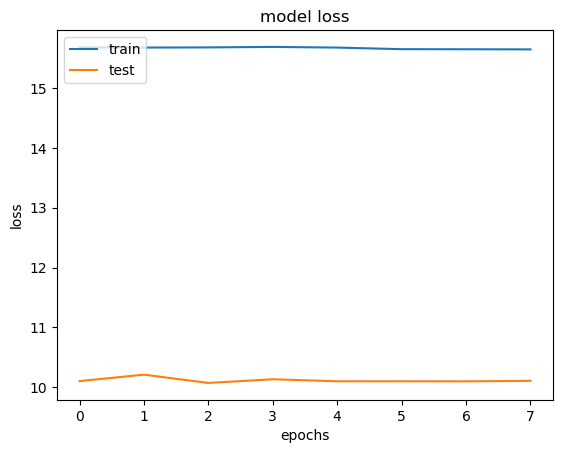

In [345]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')

In [292]:
def shift_data(data):
    shifted_data = np.roll(data, shift=1, axis=0)
    print(shifted_data.shape)
    shifted_data[0,..., 0] = 0
    return shifted_data[..., 0]

In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8406717794852552984
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7387101280
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9938650076501423205
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1"
]


2023-07-05 17:48:11.433984: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-05 17:48:11.434357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-05 17:48:11.434630: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce GTX 1070 Ti computeCapability: 6.1
coreClock: 1.683GHz coreCount: 19 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 238.66GiB/s
2023-07-05 17:48:11.434680: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-05 17:48:11.434748: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-05 17:48:11.434781: I tensorflow/stream_executor/platf

In [346]:

evaluation_data_inputs = test_inputs
# print(evaluation_data_inputs.shape)
predictions = model.predict(evaluation_data_inputs)
# print(predictions.shape)
evaluation_data_targets = test_targets
print(evaluation_data_inputs.shape)
rolled = shift_data(evaluation_data_inputs)
print(evaluation_data_inputs.shape)




(21, 400, 400, 3)
(21, 400, 400, 3)
(21, 400, 400, 3)


Text(0.5, 1.0, 'Prediction and Targets for 28 timestep x=333 y=249')

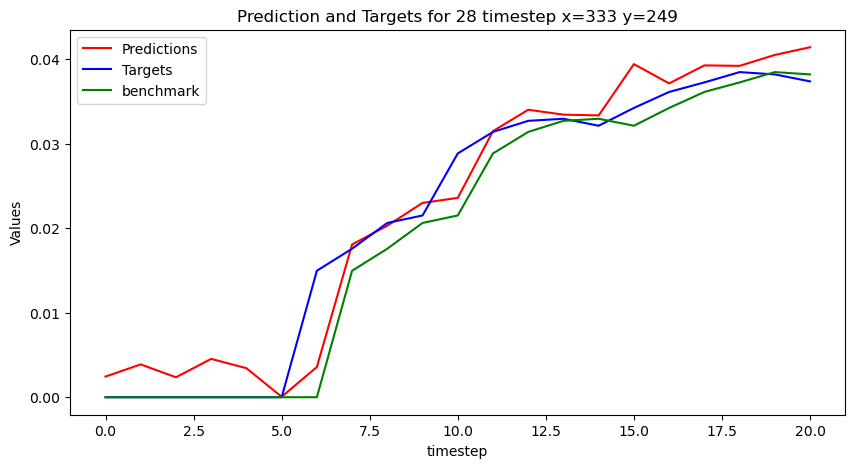

In [348]:
while True:
    rand_cell_x = np.random.randint(0, 400)
    rand_cell_y = np.random.randint(0, 400)
    if np.sum(evaluation_data_targets[:, rand_cell_x, rand_cell_y]) > 0:
        break
plt.figure(figsize=(10, 5))
plt.plot(predictions[:, rand_cell_x, rand_cell_y, 0], 'r-', label="Predictions")
plt.plot(evaluation_data_targets[:, rand_cell_x, rand_cell_y], 'b-', label="Targets")
plt.plot(evaluation_data_inputs[:, rand_cell_x, rand_cell_y, 0], 'g-', label="benchmark")

plt.xlabel("timestep")
plt.ylabel("Values")
plt.legend()
plt.title(f"Prediction and Targets for {28} timestep x={rand_cell_x} y={rand_cell_y}")

In [324]:
from copy import deepcopy

In [349]:
def evaluation(model, inputs, targets):
    #Evaluate the benchmark model
    benchmark_predictions = deepcopy(inputs[...,0])
    benchmark_mae = mean_absolute_error(targets.flatten(), benchmark_predictions.flatten())
    model_predictions = model.predict(inputs)
    predictions_mae = mean_absolute_error(targets.flatten(), model_predictions.flatten())
    return benchmark_mae, predictions_mae

In [350]:

bench, pred = evaluation(model, evaluation_data_inputs , evaluation_data_targets)
print("bench: ", bench*10000)
print("pred:  ", pred*10000)

bench:  11.91265274229504
pred:   47.28140775114298


In [ ]:
# for i in range(21):
#     if i == 0:
#         plt.imshow(evaluation_data_inputs[i,...,0], vmin=0, vmax=0.06)
#         cb = plt.colorbar()
#         display.clear_output(wait=True)
#         display.display(plt.gcf())
#         cb.remove()
#     else:
#         plt.imshow(predictions[i,...,0], vmin=0, vmax=0.06)
#         cb = plt.colorbar()
#         display.clear_output(wait=True)
#         display.display(plt.gcf())
#         cb.remove()

In [ ]:
# for i in range(21):

#     plt.imshow(evaluation_data_targets[i,...], vmin=0, vmax=0.06)
#     cb = plt.colorbar()
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     cb.remove()

In [351]:
from copy import deepcopy

residual_inputs = deepcopy(test_inputs)
# print(residual_inputs.shape)
residual_predictions = []
data_in = residual_inputs[0, ...]
for i in range(20):
    data_in = data_in[None,...]
    data_out = model(data_in)
    next_data = residual_inputs[i+1,...]
    wd, rf, dem = tf.unstack(next_data, axis=-1)
    data_in = np.stack([data_out[0,...,0], rf, dem], axis=-1)
    residual_predictions.append(data_out[0,...,0])
residual_targets = deepcopy(test_targets)
rolled = shift_data(residual_inputs)

(21, 400, 400, 3)


(20, 400, 400)


Text(0.5, 1.0, 'Prediction and Targets for timestep=21 l=316 m=275')

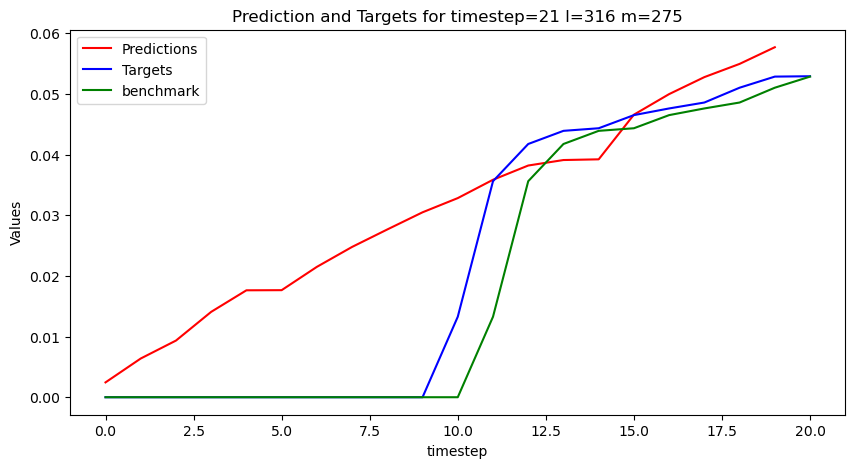

In [352]:
residual_predictions = np.array(residual_predictions)
print(residual_predictions.shape)
while True:
    rand_cell_x = np.random.randint(0, 400)
    rand_cell_y = np.random.randint(0, 400)
    if np.sum(residual_targets[:, rand_cell_x, rand_cell_y]) > 0:
        break
plt.figure(figsize=(10, 5))
plt.plot(residual_predictions[:, rand_cell_x, rand_cell_y], 'r-', label="Predictions")
plt.plot(residual_targets[:, rand_cell_x, rand_cell_y], 'b-', label="Targets")
plt.plot(evaluation_data_inputs[:, rand_cell_x, rand_cell_y, 0], 'g-', label="benchmark")

plt.xlabel("timestep")
plt.ylabel("Values")
plt.legend()
plt.title(f"Prediction and Targets for timestep={21} l={rand_cell_x} m={rand_cell_y}")

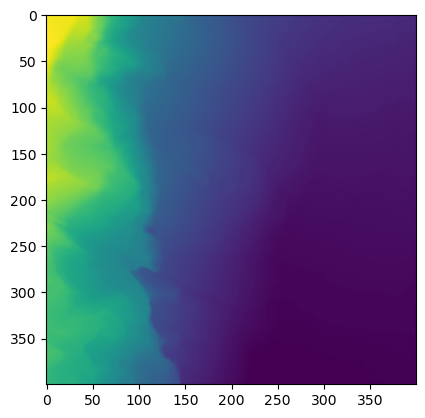

In [353]:
plt.imshow(residual_inputs[5,...,2])

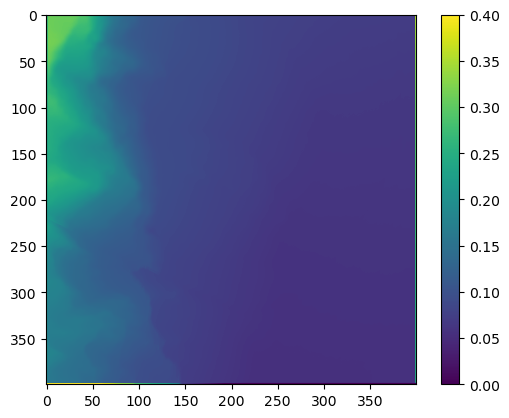

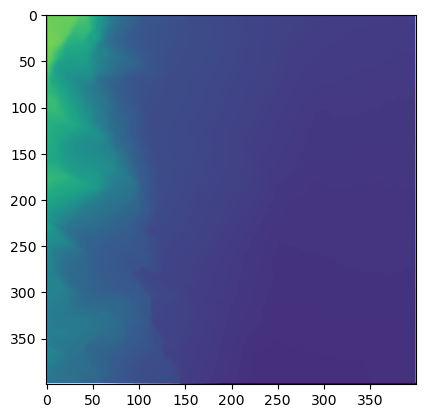

In [357]:
for i in range(20):

    plt.imshow(residual_predictions[i,...],vmin=0, vmax=0.4)
    cb = plt.colorbar()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    cb.remove()

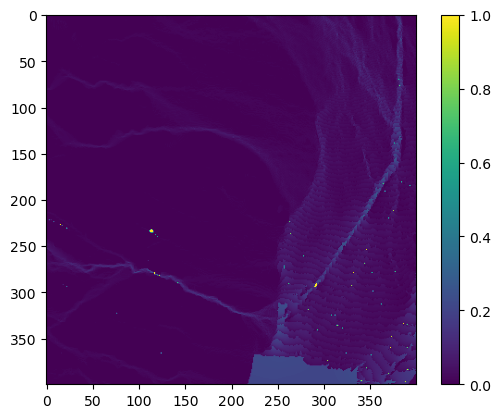

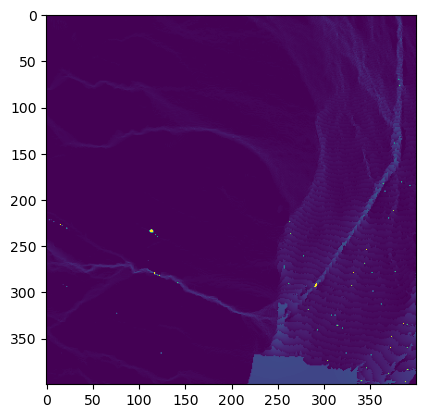

In [365]:
for i in range(19):
    
    plt.imshow(residual_targets[i,...], vmin=0, vmax=1)
    cb = plt.colorbar()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    cb.remove()
 

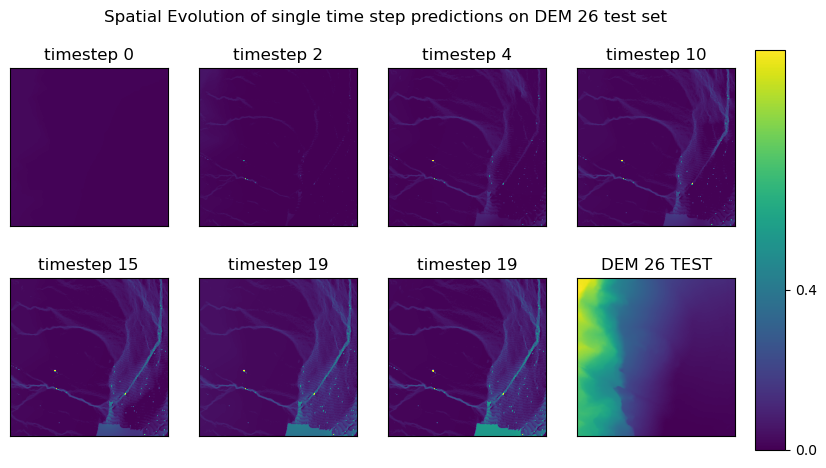

In [372]:
vmin = 0#np.min(np.array(dset_292["waterdepth_14"]))
vmax = 0.4#np.max(np.array(dset_292["waterdepth_14"]))
plt.figure(figsize=(10, 5))
plt.suptitle("Spatial Evolution of single time step predictions on DEM 26 test set")

plt.subplot(2, 4, 1)
plt.imshow(predictions[0,...], vmin=vmin, vmax=vmax)
plt.title("timestep 0")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 2)
plt.imshow(predictions[5,...], vmin=vmin, vmax=vmax)
plt.title("timestep 2")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 3)
plt.imshow(predictions[8,...], vmin=vmin, vmax=vmax)
plt.title("timestep 4")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 4)
plt.imshow(predictions[10,...], vmin=vmin, vmax=vmax)
plt.title("timestep 10")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 5)
plt.imshow(predictions[12,...], vmin=vmin, vmax=vmax)
plt.title("timestep 15")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 6)
plt.imshow(predictions[15,...], vmin=vmin, vmax=vmax)
plt.title("timestep 19")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 7)
plt.imshow(predictions[19,...], vmin=vmin, vmax=vmax)
plt.title("timestep 19")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 8)
plt.imshow(residual_inputs[5,...,2])
plt.title("DEM 26 TEST")
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(right=0.85)  # Adjust the position of subplots
cax = plt.axes([0.87, 0.1, 0.03, 0.8])  # Position and size of the color bar
# Get the minimum and maximum values for color mapping



# Add the color bar with adjusted scale
plt.colorbar(cax=cax, ticks=[vmin, vmax])  # Set the color bar ticks as per vmin and vmax

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
#import seaborn as sns
from IPython import display
import time
import h5py
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


2023-07-04 02:58:46.326139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# configs for training best models

In [ ]:
# import datasets
